<a href="https://colab.research.google.com/github/dvillaj/R_Examples/blob/main/Example_Segmentation_and_dimensionality_reduction_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML Example

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
install.packages("C50")
library(C50)

package 'C50' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'C50'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Daniel\Documents\R\R-4.0.5\library\00LOCK\C50\libs\x64\C50.dll  a C:\Users\Daniel\Documents\R\R-4.0.5\library\C50\libs\x64\C50.dll: Permission denied"
Warning message:
"restored 'C50'"



The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\Rtmp4AfF8H\downloaded_packages


In [3]:
install.packages("flexclust")
library(flexclust)

package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\Rtmp4AfF8H\downloaded_packages


Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [4]:
install.packages("modeldata")
library(modeldata)

package 'modeldata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\Rtmp4AfF8H\downloaded_packages


In [5]:
data(mlc_churn)

In [6]:
glimpse(mlc_churn)

Rows: 5,000
Columns: 20
$ state                         <fct> KS, OH, NJ, OH, OK, AL, MA, MO, LA, WV, ~
$ account_length                <int> 128, 107, 137, 84, 75, 118, 121, 147, 11~
$ area_code                     <fct> area_code_415, area_code_415, area_code_~
$ international_plan            <fct> no, no, no, yes, yes, yes, no, yes, no, ~
$ voice_mail_plan               <fct> yes, yes, no, no, no, no, yes, no, no, y~
$ number_vmail_messages         <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, ~
$ total_day_minutes             <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4~
$ total_day_calls               <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, ~
$ total_day_charge              <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98~
$ total_eve_minutes             <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6,~
$ total_eve_calls               <int> 99, 103, 110, 88, 122, 101, 108, 94, 80,~
$ total_eve_charge              <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75,~
$ total_night_mi

Let's separate the full dataset between train and test


In [7]:
mlc_churn <- mlc_churn %>% mutate(id = row_number())
churnTrain <- mlc_churn %>% 
          sample_frac(.70)
churnTest  <- anti_join(mlc_churn, churnTrain, by = 'id')

Let's create a segmentation model to make 3 clusters from our clients data

In [8]:
set.seed(6)
Clientes_Historicos = select(churnTrain, total_day_charge, total_eve_calls, total_eve_charge)

In [9]:
head(Clientes_Historicos, 10)

total_day_charge,total_eve_calls,total_eve_charge
<dbl>,<int>,<dbl>
24.23,107,14.97
27.39,111,14.50
21.11,115,10.53
8.87,113,18.71
17.48,91,17.57
33.95,68,9.71
34.87,123,17.28
36.75,133,18.89
28.61,103,23.03


In [10]:
clustering_model <- kcca(Clientes_Historicos, k = 3, family = kccaFamily("kmeans"), save.data = TRUE)

In [11]:
Clientes_Historicos %>% 
  mutate(clustering_group = clusters(clustering_model)) %>%
  head()

total_day_charge,total_eve_calls,total_eve_charge,clustering_group
<dbl>,<int>,<dbl>,<int>
24.23,107,14.97,3
27.39,111,14.50,3
21.11,115,10.53,2
8.87,113,18.71,2
17.48,91,17.57,3
33.95,68,9.71,1


Let's create new variables which summary all actual variables with a dimensional reduction model

In [2]:
dimensionality_reduction_model <- prcomp(Clientes_Historicos)

ERROR: Error in prcomp(Clientes_Historicos): objeto 'Clientes_Historicos' no encontrado


In [13]:
head(dimensionality_reduction_model$x, 10)

PC1,PC2,PC3
6.755405,6.437024,-2.1526028
10.759214,3.279211,-2.6045193
14.749414,9.539140,-6.6158652
12.737528,21.827907,1.4877455
-9.252001,13.182940,0.4121729
-32.234560,-3.365495,-7.3332639
22.769989,-4.167860,0.2170417
32.773104,-6.024964,1.8342514
2.764637,2.102838,5.9366860
11.760144,4.199207,1.9493193


Let's show all original variables, the calculated segment, and the new variables from the dimensional reduction model

In [14]:
Clientes_Historicos <- mutate(Clientes_Historicos,
    clustering_group = clusters(clustering_model),
    PC1 = dimensionality_reduction_model$x[, "PC1"],
    PC2 = dimensionality_reduction_model$x[, "PC2"]
  )

In [15]:
head(Clientes_Historicos, 10)

total_day_charge,total_eve_calls,total_eve_charge,clustering_group,PC1,PC2
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
24.23,107,14.97,3,6.755405,6.437024
27.39,111,14.50,3,10.759214,3.279211
21.11,115,10.53,2,14.749414,9.539140
8.87,113,18.71,2,12.737528,21.827907
17.48,91,17.57,3,-9.252001,13.182940
33.95,68,9.71,1,-32.234560,-3.365495
34.87,123,17.28,2,22.769989,-4.167860
36.75,133,18.89,2,32.773104,-6.024964
28.61,103,23.03,3,2.764637,2.102838


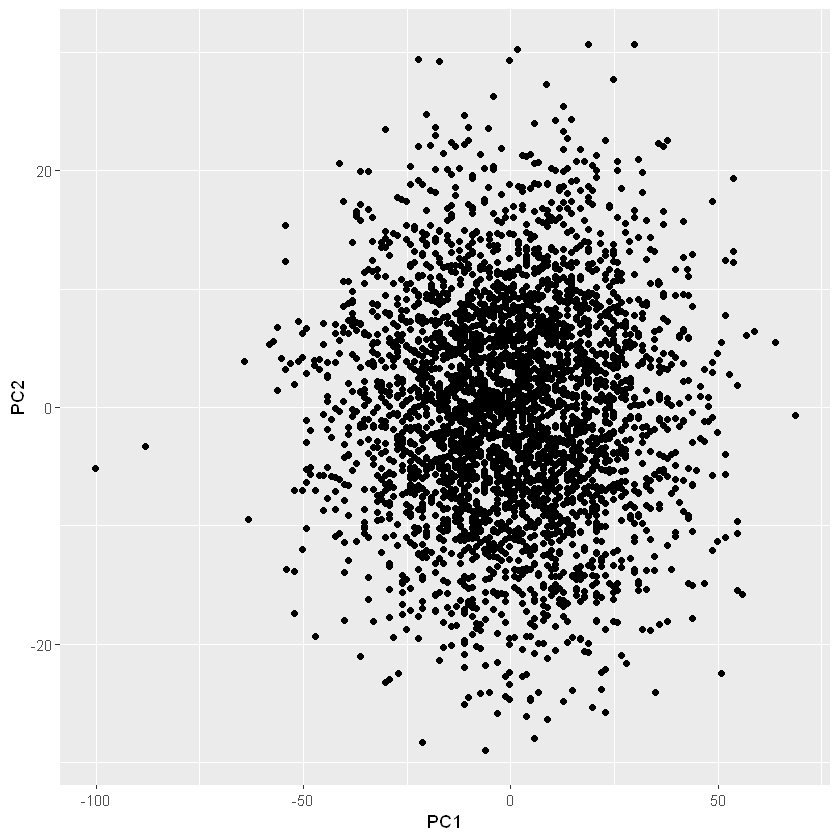

In [16]:
ggplot(Clientes_Historicos, aes(PC1, PC2)) + geom_point()

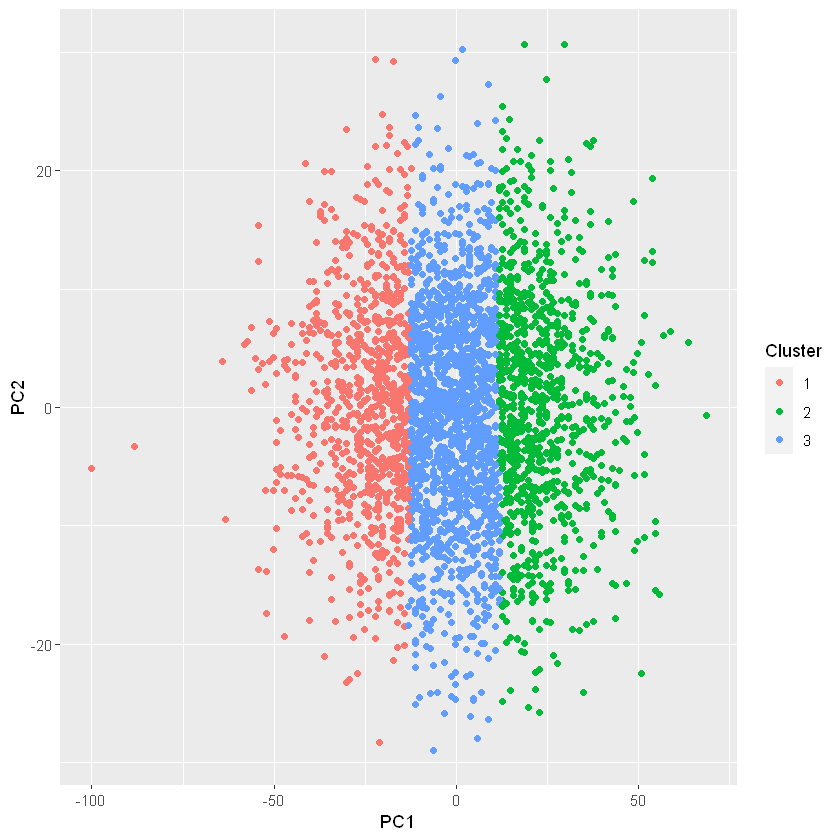

In [17]:
ggplot(Clientes_Historicos, aes(PC1, PC2)) + 
  geom_point(aes(color = factor(clustering_group))) + 
  labs(color = "Cluster")

Let's calculate the segment and the dimension reduction variables on the test dataset

In [18]:
Clientes_Nuevos <- select(churnTest, total_day_charge, total_eve_calls, total_eve_charge)

In [19]:
head(Clientes_Nuevos, 5)

total_day_charge,total_eve_calls,total_eve_charge
<dbl>,<int>,<dbl>
27.47,103,16.62
50.90,88,5.26
37.98,101,18.75
37.09,108,29.62
26.69,94,8.76


In [20]:
clustering_group_prediction <- clusters(clustering_model, Clientes_Nuevos)

In [21]:
dimensionality_reduction_model_nuevo <- prcomp(Clientes_Nuevos)

In [22]:
Clientes_Nuevos <- mutate(Clientes_Nuevos, 
    clustering_group_prediction,
    PC1 = dimensionality_reduction_model_nuevo$x[, "PC1"],
    PC2 = dimensionality_reduction_model_nuevo$x[, "PC2"])

In [23]:
head(Clientes_Nuevos, 10)

total_day_charge,total_eve_calls,total_eve_charge,clustering_group_prediction,PC1,PC2
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
27.47,103,16.62,3,-2.871341,3.162784
50.90,88,5.26,3,11.834075,-20.539510
37.98,101,18.75,3,-1.010412,-7.357110
37.09,108,29.62,3,-8.009268,-6.299821
26.69,94,8.76,3,6.146017,3.770453
21.90,71,8.92,1,29.206217,8.261985
26.62,75,21.05,1,25.132838,3.679729
20.52,76,26.11,1,24.207152,9.827614
26.37,93,20.37,3,7.138314,4.158979


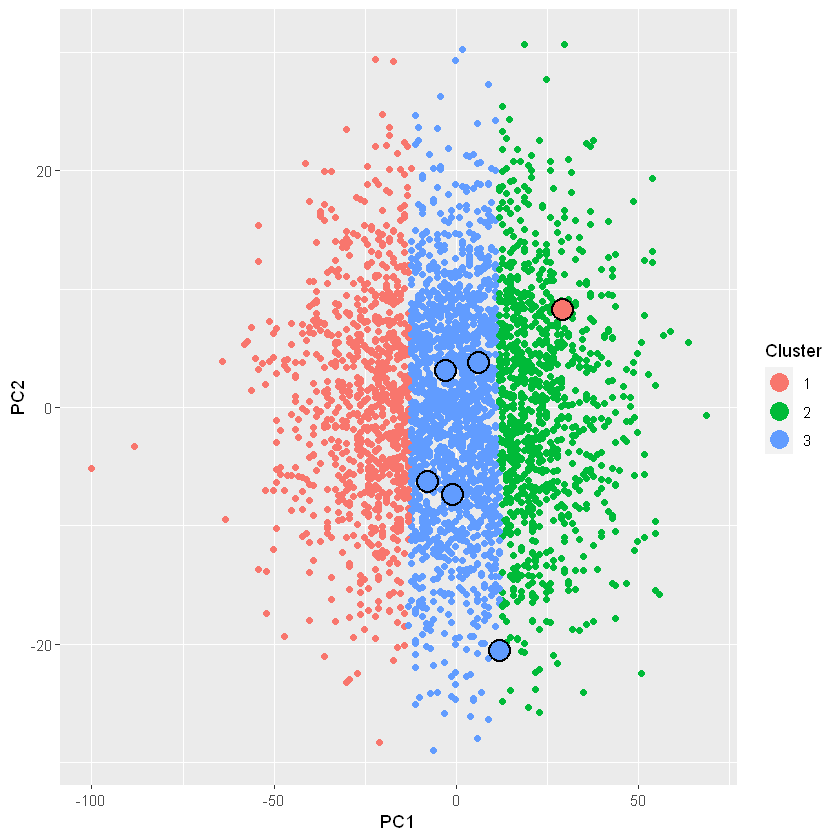

In [24]:
ggplot(Clientes_Historicos, aes(PC1, PC2, color = factor(clustering_group))) + geom_point() + 
  geom_point(data = head(Clientes_Nuevos, 6), size = 6, color = "black") + 
  geom_point(data = head(Clientes_Nuevos, 6), aes( color = factor(clustering_group_prediction)), size = 5)+ 
  labs(color = "Cluster")